## CNM

In [1]:
import sys
sys.path.insert(0,'cnm-main')
sys.path.insert(0,'cnm-main/examples')
from cnm import Clustering, TransitionProperties, Propagation
import numpy as np
from sklearn.cluster import KMeans

%load_ext autoreload
%autoreload 2

In [109]:
# CNM parameters:
# ---------------
K = 100 # Number of clusters
L = 20 # Model order

In [110]:
# Load data
case_data = np.load('../Wormpose/data/opensource_data/x_all.npy') # (12, 33600, 5)
data = case_data # (n_time, n_dim)
dt = 1 / 32
t = np.arange(data.shape[0]) * dt

In [111]:
# Clustering
cluster_config = {
        'data': data,
        'cluster_algo': KMeans(n_clusters=K,max_iter=1000,n_init=20),
        'dataset': 'wormpose',
        }

clustering = Clustering(**cluster_config)

Perform clustering
------------------
Use 100 clusters
Read from output/wormpose\clustering-K100.npz




In [112]:
# Transition properties
transition_config = {
        'clustering': clustering,
        'dt': dt,
        'K': K,
        'L': L,
        }

transition_properties = TransitionProperties(**transition_config)

Identify the transition properties
----------------------------------
Model order: 20
Compute Q
Compute T
Average transition time: 0.096




In [113]:
# Propagation
propagation_config = {
        'transition_properties': transition_properties,
        }

ic = 1        # Index of the centroid to start in
t_total = 300 # Total simulation time
dt_hat = dt   # To spline-interpolate the centroid-to-centroid trajectory

propagation = Propagation(**propagation_config)
t_hat, x_hat = propagation.run(t_total,ic,dt_hat)

Starting CNM propagation
------------------------
Total time: 300


Propagation progress: 100%|████████████████████████████████████████████████████████████████████▉| 9.997916666666672/10 [00:00<00:00, 26.21it/s]

## Plot the results

Plot phase space
----------------



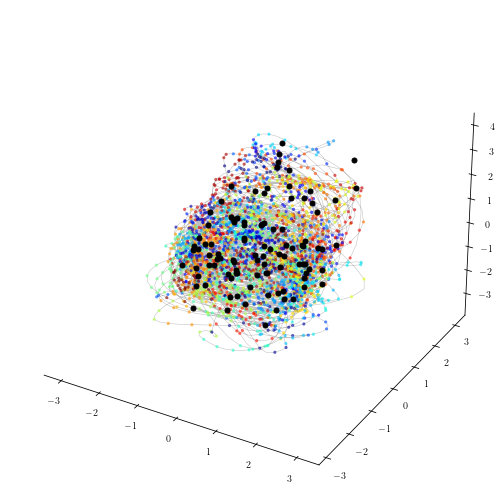

In [114]:
from examples.helper import (plot_phase_space, plot_time_series,plot_cpd,
                    plot_autocorrelation)

# phase space
plot_phase_space(data,clustering.centroids,clustering.labels)

Plot time series
----------------



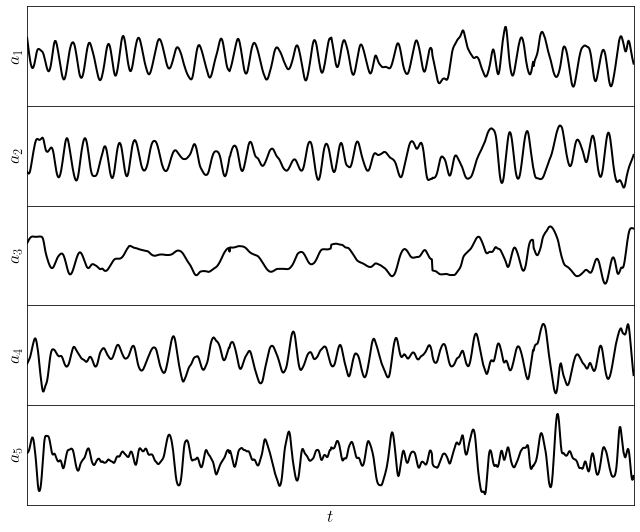

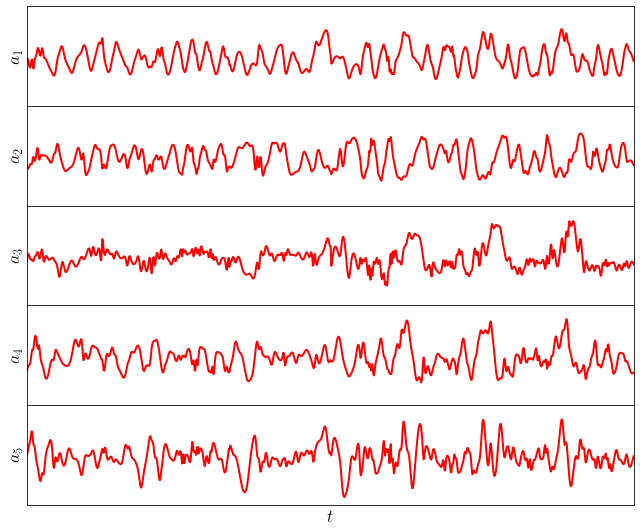

In [128]:
# time series
time_range = (0,30)
n_dim = 5
plot_label = ['a_1','a_2','a_3','a_4','a_5']
plot_time_series(t,data,t_hat,x_hat,time_range,plot_label,n_dim)

Plot cluster probability distribution
-------------------------------------



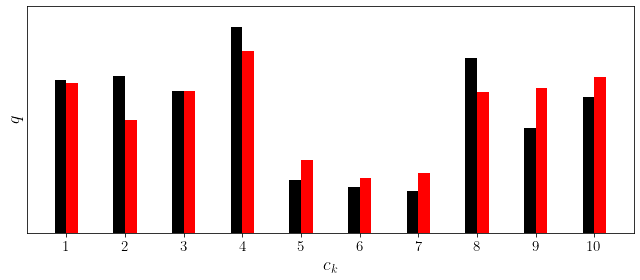

In [134]:
# cluster probability distribution
plot_cpd(data,x_hat)

Plot autocorrelation function
-----------------------------



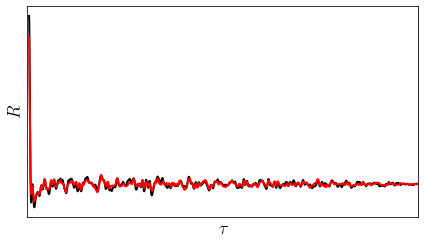

In [133]:
# autocorrelation function
time_blocks = 100 #t_hat[-1]
time_range = (-0.5,time_blocks)
plot_autocorrelation(t,data,t_hat,x_hat,time_blocks,time_range)